## **UC San Diego Data Science Casptone Project [Winter 2025]**

#### **Team Members**
- Catherine Back
- Yuancheng (Kaleo) Cao
- Aj Falak
- Kavya Sriram

### **Introduction**

### **Exploratory Data Analysis (EDA)**

#### Get and Load Dataset

In [9]:
# Imports
import sys
import zipfile

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display
import pandas as pd
import seaborn as sns

In [10]:
import zipfile

zip_file_path = 'pretrial_release_data2023.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open('pretrial_release_data2023.csv') as csv_file:
        pretrial_df = pd.read_csv(csv_file)

pretrial_df

,Internal_Case_ID,Gender,Race,Ethnicity,Age_at_Crime,Age_at_Arrest,Court_Name,Court_ORI,County_Name,District,...,prior_misd_cnt,pend_vfo,pend_nonvfo,pend_misd,supervision,rearrest,rearrest_date,rearrest_firearm,rearrest_date_firearm,arr_cycle_id
0,0x7D5A7A079A4D37CF1E45EC4,Male,Black,Non Hispanic,24,24,Kings Criminal Court,NY023033J,Kings,District 2,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,1441855.0
1,0x65DA7AE4C1F68EAD828F68B,Male,White,Hispanic,51,51,Queens Criminal Court,NY040033J,Queens,District 11,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,1135968.0
2,0x74775A9DB79BE9D2562A37B,Male,White,Non Hispanic,30,30,Schoharie County Court (M-B),NY047013J,Schoharie,District 3,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,190950.0
3,0xE05C798F936677645105A30,Male,Unknown,Unknown,24,24,Nassau District Court,NY029013J,Nassau,District 10N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x44403907DC0611F6DD9BE0F,Male,White,Hispanic,29,29,New York Criminal Court,NY030033J,New York,District 1,...,1.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,905753.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285387,0x2BBED7AB218CF5642D07062,Male,Black,Non Hispanic,27,27,New York Criminal Court,NY030033J,New York,District 1,...,1.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,1448385.0
285388,0xB6A2649C599FC43E6FDE84A,Male,Other,Unknown,27,27,Nassau District Court,NY029013J,Nassau,District 10N,...,0.0,0.0,0.0,0.0,0.0,Misdemeanor,1/1/2024,0.0,NaN,1246052.0
285389,0xB4212660AC6DEC0827CDD85,Male,Unknown,Unknown,25,25,Nassau District Court,NY029013J,Nassau,District 10N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285390,0x1B30669744902CD3498DF0C,Male,Black,Non Hispanic,34,34,Schenectady City Court,NY046011J,Schenectady,District 4,...,0.0,0.0,0.0,0.0,1.0,Non-violent felony,10/1/2023,0.0,NaN,1243671.0


In [11]:
nan_percentages = pretrial_df.isna().mean() * 100
sorted_nan_percentages = nan_percentages.sort_values(ascending=False)
len(sorted_nan_percentages[sorted_nan_percentages > 1])

52

In [12]:
sorted_nan_percentages
col_list = sorted_nan_percentages[sorted_nan_percentages > 1].index.tolist()
col_list

['First_Unsecured_App_Bond',
 'Partially_Secured_App_Bond_Perc',
 'First_Partially_Secured_App_Bond',
 'First_Unsecured_Surety_Bond',
 'First_Secured_App_Bond',
 'rearrest_date_firearm',
 'First_Secured_Surety_Bond',
 'First_Bail_Set_Credit',
 'Top_Arraign_Attempt_Indicator',
 'Days_Arraign_Remand_First_Released',
 'Days_Arraign_Bail_Set_to_First_Posted',
 'Bail_Made_Indicator',
 'Num_of_Stayed_WO',
 'First_Bench_Warrant_Date',
 'Non_Stayed_WO',
 'First_Insurance_Company_Bail_Bond',
 'Partially_Secured_Surety_Bond_Perc',
 'First_Partially_Secured_Surety_Bond',
 'Days_Arraign_Bail_Set_to_First_Release',
 'UCMSLiveDate',
 'rearrest_date',
 'First_Bail_Set_Cash',
 'Most_Severe_Sentence',
 'Top_Conviction_Law',
 'Top_Conviction_Article_Section',
 'Top_Charge_at_Conviction',
 'Top_Charge_Severity_at_Conviction',
 'Top_Charge_Weight_at_Conviction',
 'Order_of_Protection',
 'Days_Arraign_to_Dispo',
 'Disposition_Date',
 'arr_cycle_id',
 'rearrest',
 'prior_vfo_cnt',
 'prior_nonvfo_cnt',
 'pen

In [13]:
pretrial_df = pretrial_df[pretrial_df['rearrest'].notna()]

In [14]:
pretrial_df['rearrest'].value_counts()

rearrest
No Arrest             205084
Misdemeanor            19842
Non-violent felony     14813
Violent felony          4982
Name: count, dtype: int64

In [15]:
pretrial_df.loc[:, 'reoffend'] = pretrial_df['rearrest'].apply(lambda x: 0 if x == 'No Arrest' else 1)

/var/folders/zl/dmpncrf92wg19vdg6q96y0n40000gn/T/ipykernel_16869/1792770735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pretrial_df.loc[:, 'reoffend'] = pretrial_df['rearrest'].apply(lambda x: 0 if x == 'No Arrest' else 1)


In [16]:
pretrial_df = pretrial_df.copy()
pretrial_df.loc[:, 'First_Arraign_Date'] = pd.to_datetime(pretrial_df['First_Arraign_Date'])

In [17]:
date_columns = [col for col in pretrial_df.columns if 'date' in col.lower()]
date_columns

['First_Arraign_Date',
 'First_Bench_Warrant_Date',
 'Disposition_Date',
 'UCMSLiveDate',
 'rearrest_date',
 'rearrest_date_firearm']

In [18]:
pretrial_df.loc[:, 'First_Arraign_Date'] = pd.to_datetime(pretrial_df['First_Arraign_Date'])

In [19]:
demographics = ['Race', 'Ethnicity', 'Gender']

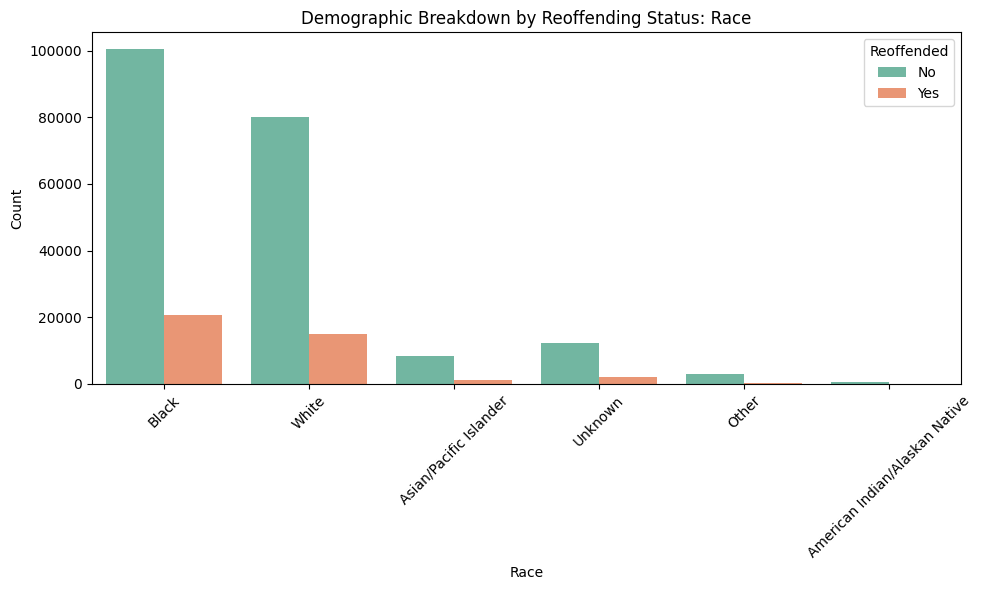

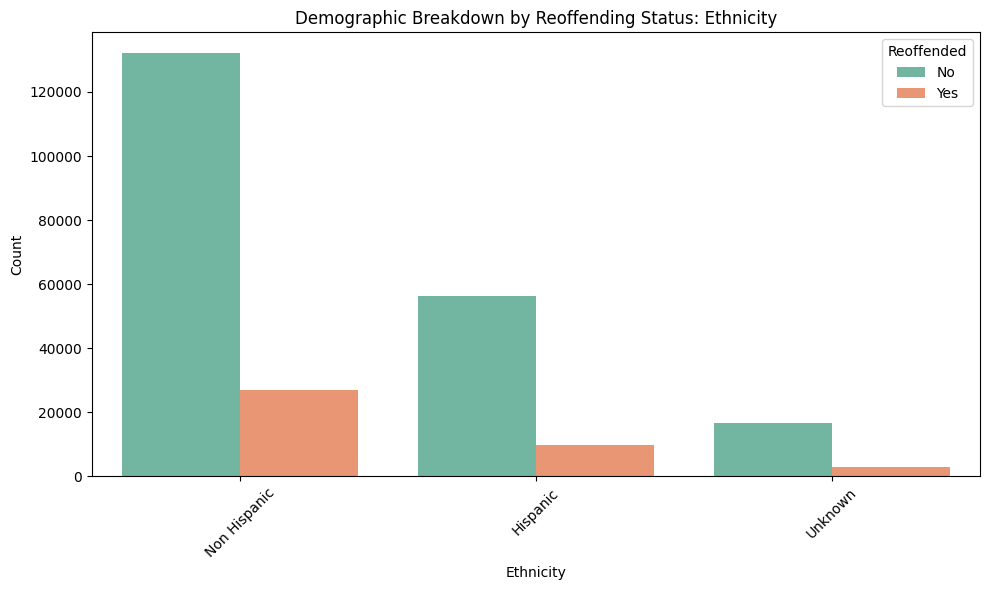

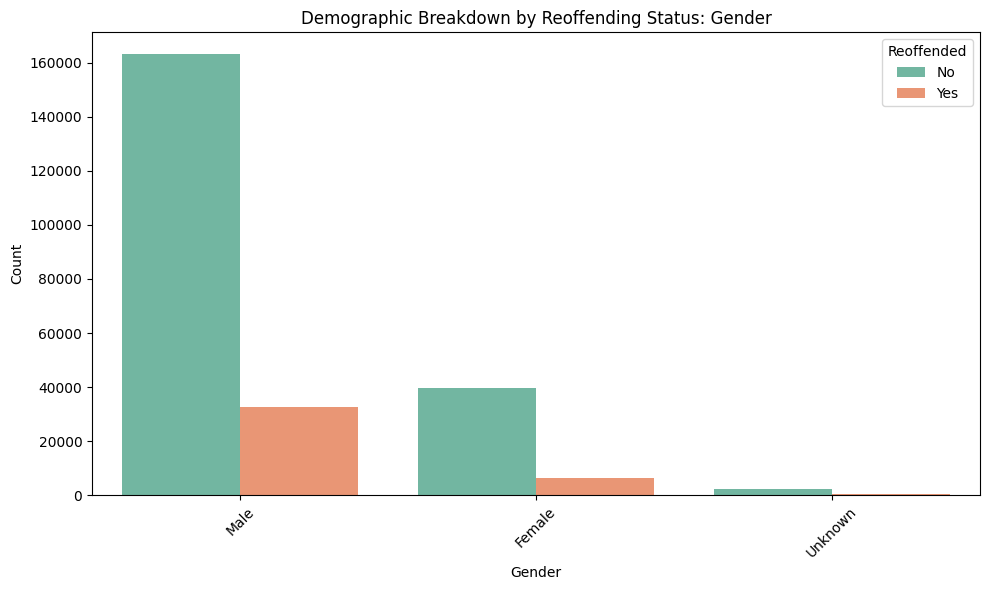

In [20]:
for demo in demographics:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=demo, hue='reoffend', data=pretrial_df, palette='Set2')
    plt.title(f'Demographic Breakdown by Reoffending Status: {demo.capitalize()}')
    plt.xlabel(demo.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Reoffended', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/var/folders/zl/dmpncrf92wg19vdg6q96y0n40000gn/T/ipykernel_16869/615823830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Arrest_Type', y='reoffend', data=reoffending_by_arrest, palette='coolwarm')


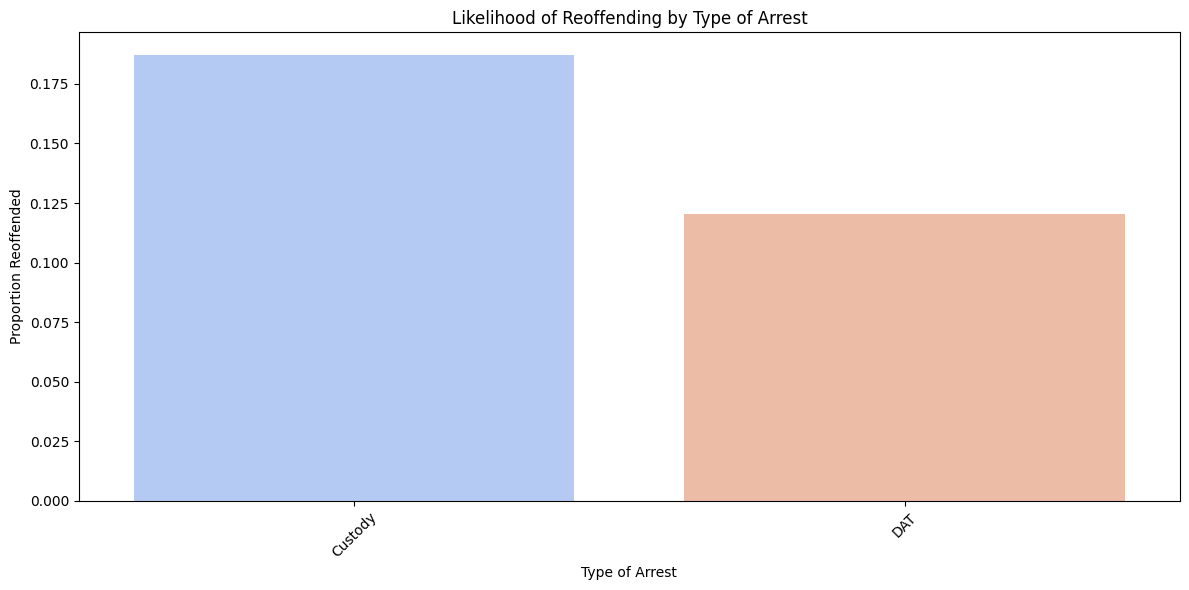

In [21]:

plt.figure(figsize=(12, 6))
reoffending_by_arrest = pretrial_df.groupby('Arrest_Type')['reoffend'].mean().reset_index()
sns.barplot(x='Arrest_Type', y='reoffend', data=reoffending_by_arrest, palette='coolwarm')
plt.title('Likelihood of Reoffending by Type of Arrest')
plt.xlabel('Type of Arrest')
plt.ylabel('Proportion Reoffended')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


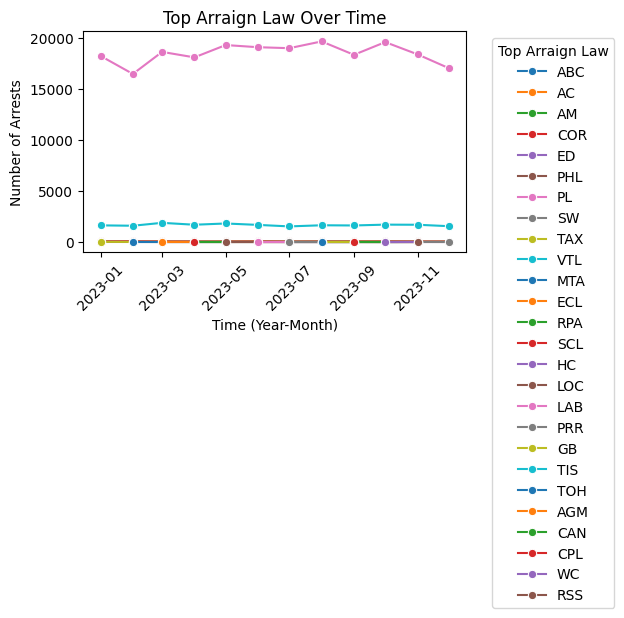

In [22]:
pretrial_df['First_Arraign_Date'] = pd.to_datetime(pretrial_df['First_Arraign_Date'])
arrest_trend = pretrial_df.groupby(['First_Arraign_Date', 'Top_Arraign_Law']).size().reset_index(name='count')
sns.lineplot(data=arrest_trend, x='First_Arraign_Date', y='count', hue='Top_Arraign_Law', marker='o', palette='tab10')
plt.title('Top Arraign Law Over Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.legend(title='Top Arraign Law', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### **Model Development without Debiasing**

### **Bias Mitigation**

### **Conclusion & Discussion**